<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Problema_de_la_ruina_del_jugador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#J1: $\$2$      J2: $\$3$ P = 0.3

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from numba import jit

In [30]:
@jit(nopython = True)
def ruina(m1 = 2, m2 = 3, p = 0.5, g = False):
  c1, c2 = m1, m2
  n = 0
  while c1 != 0 and c2 != 0:
    r = random()
    n += 1
    if r <= p:
      c1 += 1
      c2 -= 1
    else:
      c1 -= 1
      c2 += 1
  return c1, c2, n

In [31]:
@jit(nopython = True)
def repeticion(rep = 10**4, m1 = 2, m2 = 3, p = 0.5):
  l = []
  g = []
  d = []
  c = 0
  for i in range(rep):
    a, b, dur = ruina(m1, m2, p)
    g.append(a-m1)
    d.append(dur)
    if a == 0:
      c += 1
      l.append(c/(i+1))
  return l, g, d

In [34]:
p, g, dur = repeticion(10**6, p = 0.3)
print(np.mean(p))
print(np.mean(g))
print(np.mean(dur))

0.9347184705826381
-1.67346
4.188506


In [32]:
@jit(nopython = True)
def graf(m1 = 2, m2 = 3, p = 0.5):
  c1, c2 = m1, m2
  n = 0
  lx, ly = [n], [c1]
  while c1 != 0 and c2 != 0:
    r = random()
    n += 1
    if r <= p:
      c1 += 1
      c2 -= 1
    else:
      c1 -= 1
      c2 += 1
    lx.append(n)
    ly.append(c1)
  return lx,ly

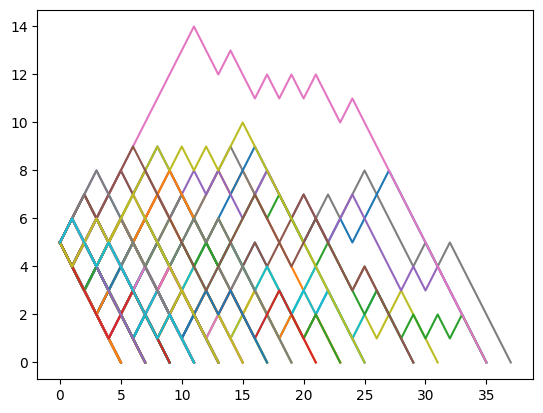

In [33]:
for i in range(100):
  x, y = graf(m1 = 5, m2 = 10, p = 0.3)
  plt.plot(x,y)
plt.show()

##Juego contra un rico

In [35]:
@jit(nopython = True)
def ruina_v2(m = 2, p = 0.5):
  c = m
  n = 0
  while c != 0:
    r = random()
    n += 1
    if r <= p:
      c += 1
    else:
      c -= 1
  return c, n

In [36]:
@jit(nopython = True)
def rep(n = 10**4, m = 2, p = 0.5):
  l = []
  g = []
  d = []
  c = 0
  for i in range(n):
    a, dur = ruina_v2(m, p)
    g.append(a-m)
    d.append(dur)
    if a == 0:
      c += 1
      l.append(c/(i+1))
  return l, g, d

In [37]:
p, g, d = rep(10**6, p = 0.3)
print(np.mean(p))
print(np.mean(g))
print(np.mean(d))

1.0
-2.0
5.001602


In [38]:
@jit(nopython = True)
def graf_v2(m = 2, p = 0.5):
  c = m
  n = 0
  lx, ly = [n], [c]
  while c != 0:
    r = random()
    n += 1
    if r <= p:
      c += 1
    else:
      c -= 1
    lx.append(n)
    ly.append(c)
  return lx,ly

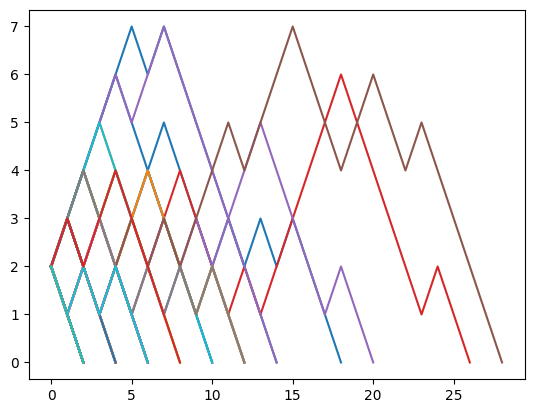

In [39]:
for i in range(100):
  x, y = graf_v2(m = 2, p = 0.3)
  plt.plot(x,y)
plt.show()